In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fx_name = 'C_CHFUSD'
data = pd.read_parquet(rf'C:\Users\jfu22\Desktop\New folder\{fx_name}.parquet')

In [111]:
data.head()

,timestamp,open,high,low,close,volume,trades
0,2023-09-04 00:45:00,1.129950,1.129950,1.129299,1.129650,92,92
1,2023-09-04 00:46:00,1.129640,1.129915,1.129404,1.129772,148,148
2,2023-09-04 00:47:00,1.129803,1.130065,1.129435,1.129790,111,111
3,2023-09-04 00:48:00,1.129836,1.130031,1.129540,1.129870,119,119
4,2023-09-04 00:49:00,1.129890,1.130089,1.129540,1.129881,165,165


In [114]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.set_index('timestamp')

In [116]:
date_range = pd.date_range(
    start = data.index.min(),
    end = data.index.max(),
    freq = 'min',
    tz = data.index.tz
)
data = data.reindex(date_range)
data.head()

,open,high,low,close,volume,trades
2023-09-04 00:45:00,1.129950,1.129950,1.129299,1.129650,92.0,92.0
2023-09-04 00:46:00,1.129640,1.129915,1.129404,1.129772,148.0,148.0
2023-09-04 00:47:00,1.129803,1.130065,1.129435,1.129790,111.0,111.0
2023-09-04 00:48:00,1.129836,1.130031,1.129540,1.129870,119.0,119.0
2023-09-04 00:49:00,1.129890,1.130089,1.129540,1.129881,165.0,165.0


In [117]:
data[['volume', 'trades']] = data[['volume', 'trades']].fillna(0)
data.head()

,open,high,low,close,volume,trades
2023-09-04 00:45:00,1.129950,1.129950,1.129299,1.129650,92.0,92.0
2023-09-04 00:46:00,1.129640,1.129915,1.129404,1.129772,148.0,148.0
2023-09-04 00:47:00,1.129803,1.130065,1.129435,1.129790,111.0,111.0
2023-09-04 00:48:00,1.129836,1.130031,1.129540,1.129870,119.0,119.0
2023-09-04 00:49:00,1.129890,1.130089,1.129540,1.129881,165.0,165.0


In [118]:
data['close'] = data['close'].ffill()
for column in ['open', 'high', 'low']:
    data[column] = data['open'].fillna(data['close'])
data.head()

,open,high,low,close,volume,trades
2023-09-04 00:45:00,1.129950,1.129950,1.129950,1.129650,92.0,92.0
2023-09-04 00:46:00,1.129640,1.129640,1.129640,1.129772,148.0,148.0
2023-09-04 00:47:00,1.129803,1.129803,1.129803,1.129790,111.0,111.0
2023-09-04 00:48:00,1.129836,1.129836,1.129836,1.129870,119.0,119.0
2023-09-04 00:49:00,1.129890,1.129890,1.129890,1.129881,165.0,165.0


In [119]:
data['minute'] = data.index.minute
data['hour'] = data.index.hour
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year
data['day_of_year'] = data.index.day_of_year
data['weekday'] = data.index.weekday
data.head()

,open,high,low,close,volume,trades,minute,hour,day,month,year,day_of_year,weekday
2023-09-04 00:45:00,1.129950,1.129950,1.129950,1.129650,92.0,92.0,45,0,4,9,2023,247,0
2023-09-04 00:46:00,1.129640,1.129640,1.129640,1.129772,148.0,148.0,46,0,4,9,2023,247,0
2023-09-04 00:47:00,1.129803,1.129803,1.129803,1.129790,111.0,111.0,47,0,4,9,2023,247,0
2023-09-04 00:48:00,1.129836,1.129836,1.129836,1.129870,119.0,119.0,48,0,4,9,2023,247,0
2023-09-04 00:49:00,1.129890,1.129890,1.129890,1.129881,165.0,165.0,49,0,4,9,2023,247,0


In [120]:
return_types = ['1min', '5min', '10min', '30min', '1h', '6h', '12h', '1d']
minute_intervals = [1, 5, 10, 30, 60, 360, 720, 1440]
data['1min'] = data['close'] / data['close'].shift(-1) - 1

for return_type, minute_interval in zip(return_types, minute_intervals):
    data[f'{return_type}'] = data['1min'].rolling(window=minute_interval).sum().shift(-minute_interval + 1)
data.head()

,open,high,low,close,volume,trades,minute,hour,day,month,...,day_of_year,weekday,1min,5min,10min,30min,1h,6h,12h,1d
2023-09-04 00:45:00,1.129950,1.129950,1.129950,1.129650,92.0,92.0,45,0,4,9,...,247,0,-0.000108,-0.000177,-0.000027,-0.000025,0.000005,-0.001072,-0.000880,-0.000530
2023-09-04 00:46:00,1.129640,1.129640,1.129640,1.129772,148.0,148.0,46,0,4,9,...,247,0,-0.000016,0.000196,0.000020,0.000134,0.000050,-0.000905,-0.000796,-0.000397
2023-09-04 00:47:00,1.129803,1.129803,1.129803,1.129790,111.0,111.0,47,0,4,9,...,247,0,-0.000071,-0.000028,0.000084,0.000053,0.000044,-0.000943,-0.000818,-0.000372
2023-09-04 00:48:00,1.129836,1.129836,1.129836,1.129870,119.0,119.0,48,0,4,9,...,247,0,-0.000009,0.000213,0.000209,0.000093,0.000028,-0.000813,-0.000778,-0.000299
2023-09-04 00:49:00,1.129890,1.129890,1.129890,1.129881,165.0,165.0,49,0,4,9,...,247,0,0.000027,0.000135,0.000231,0.000133,-0.000059,-0.000911,-0.000755,-0.000263


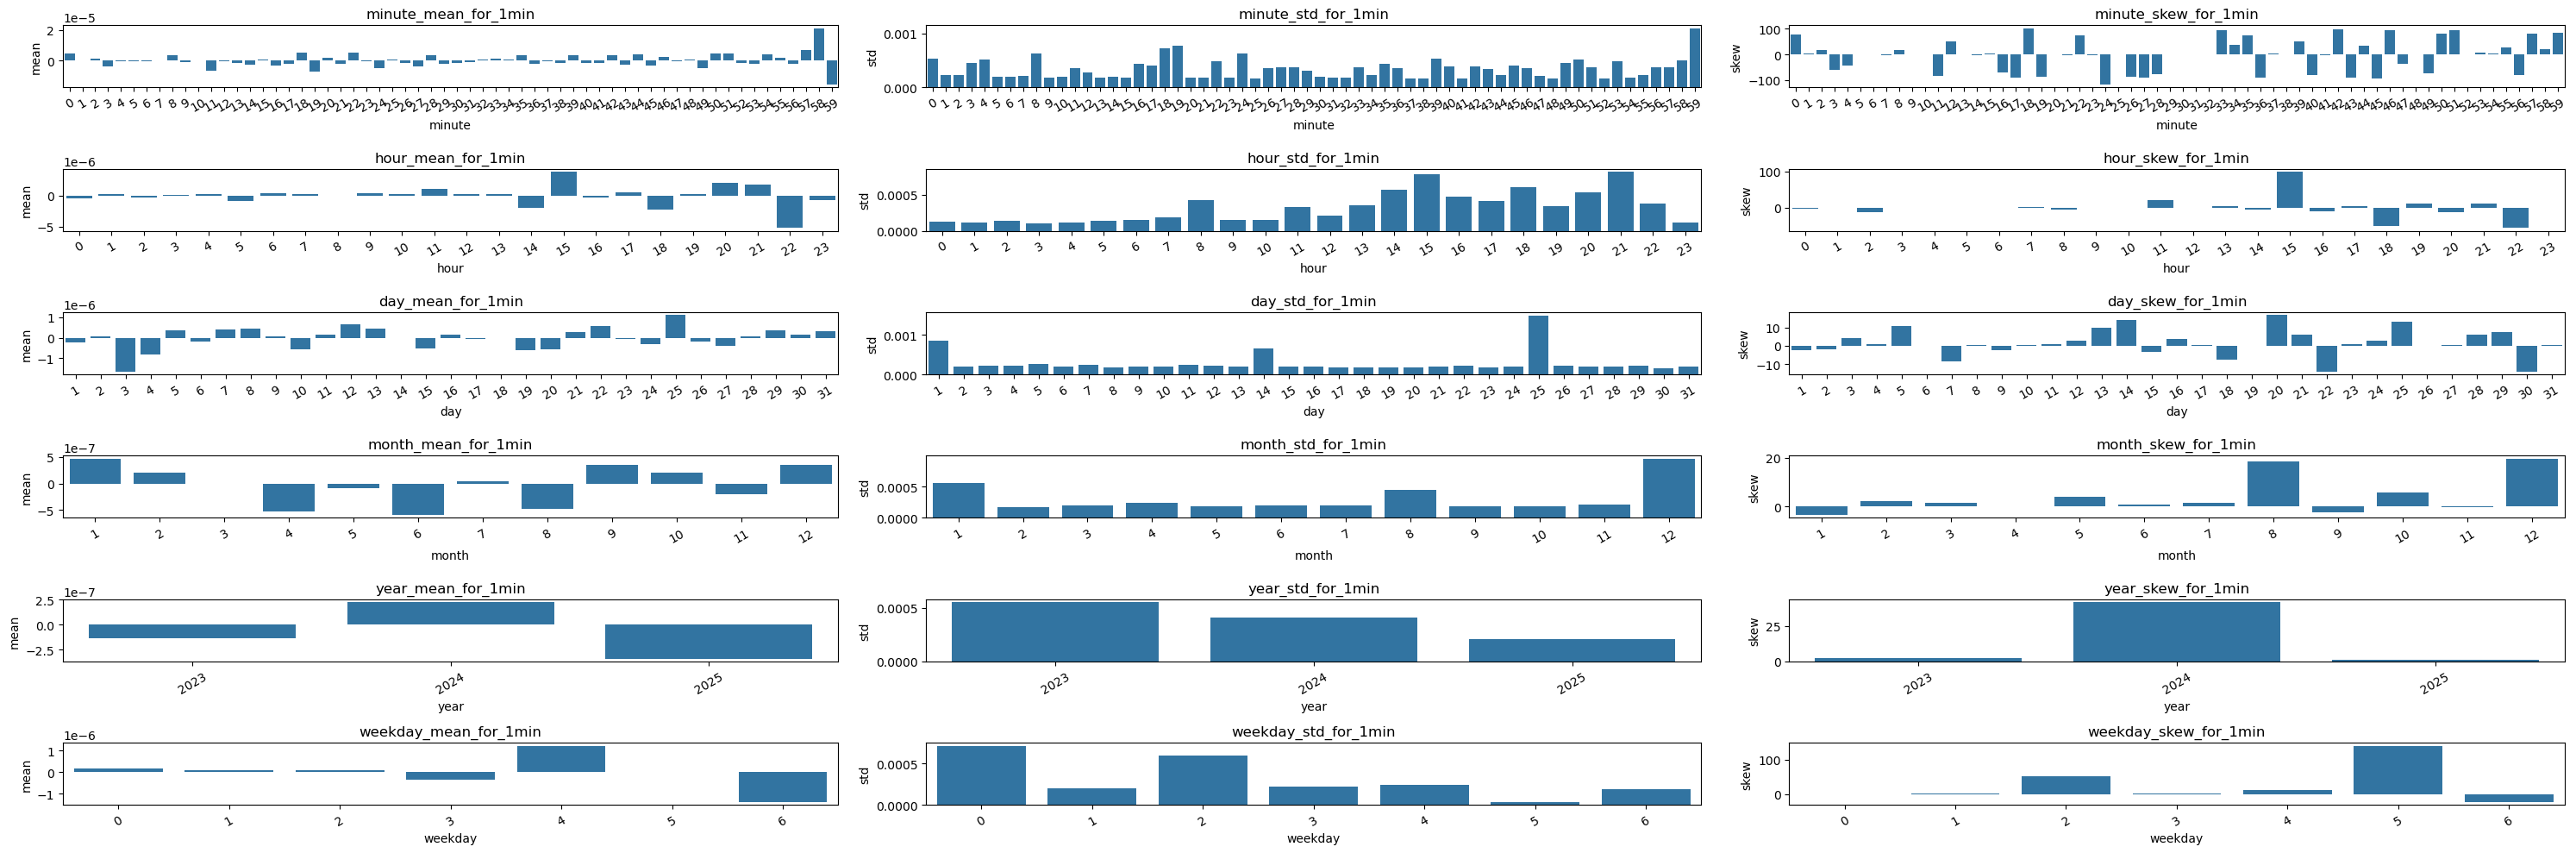

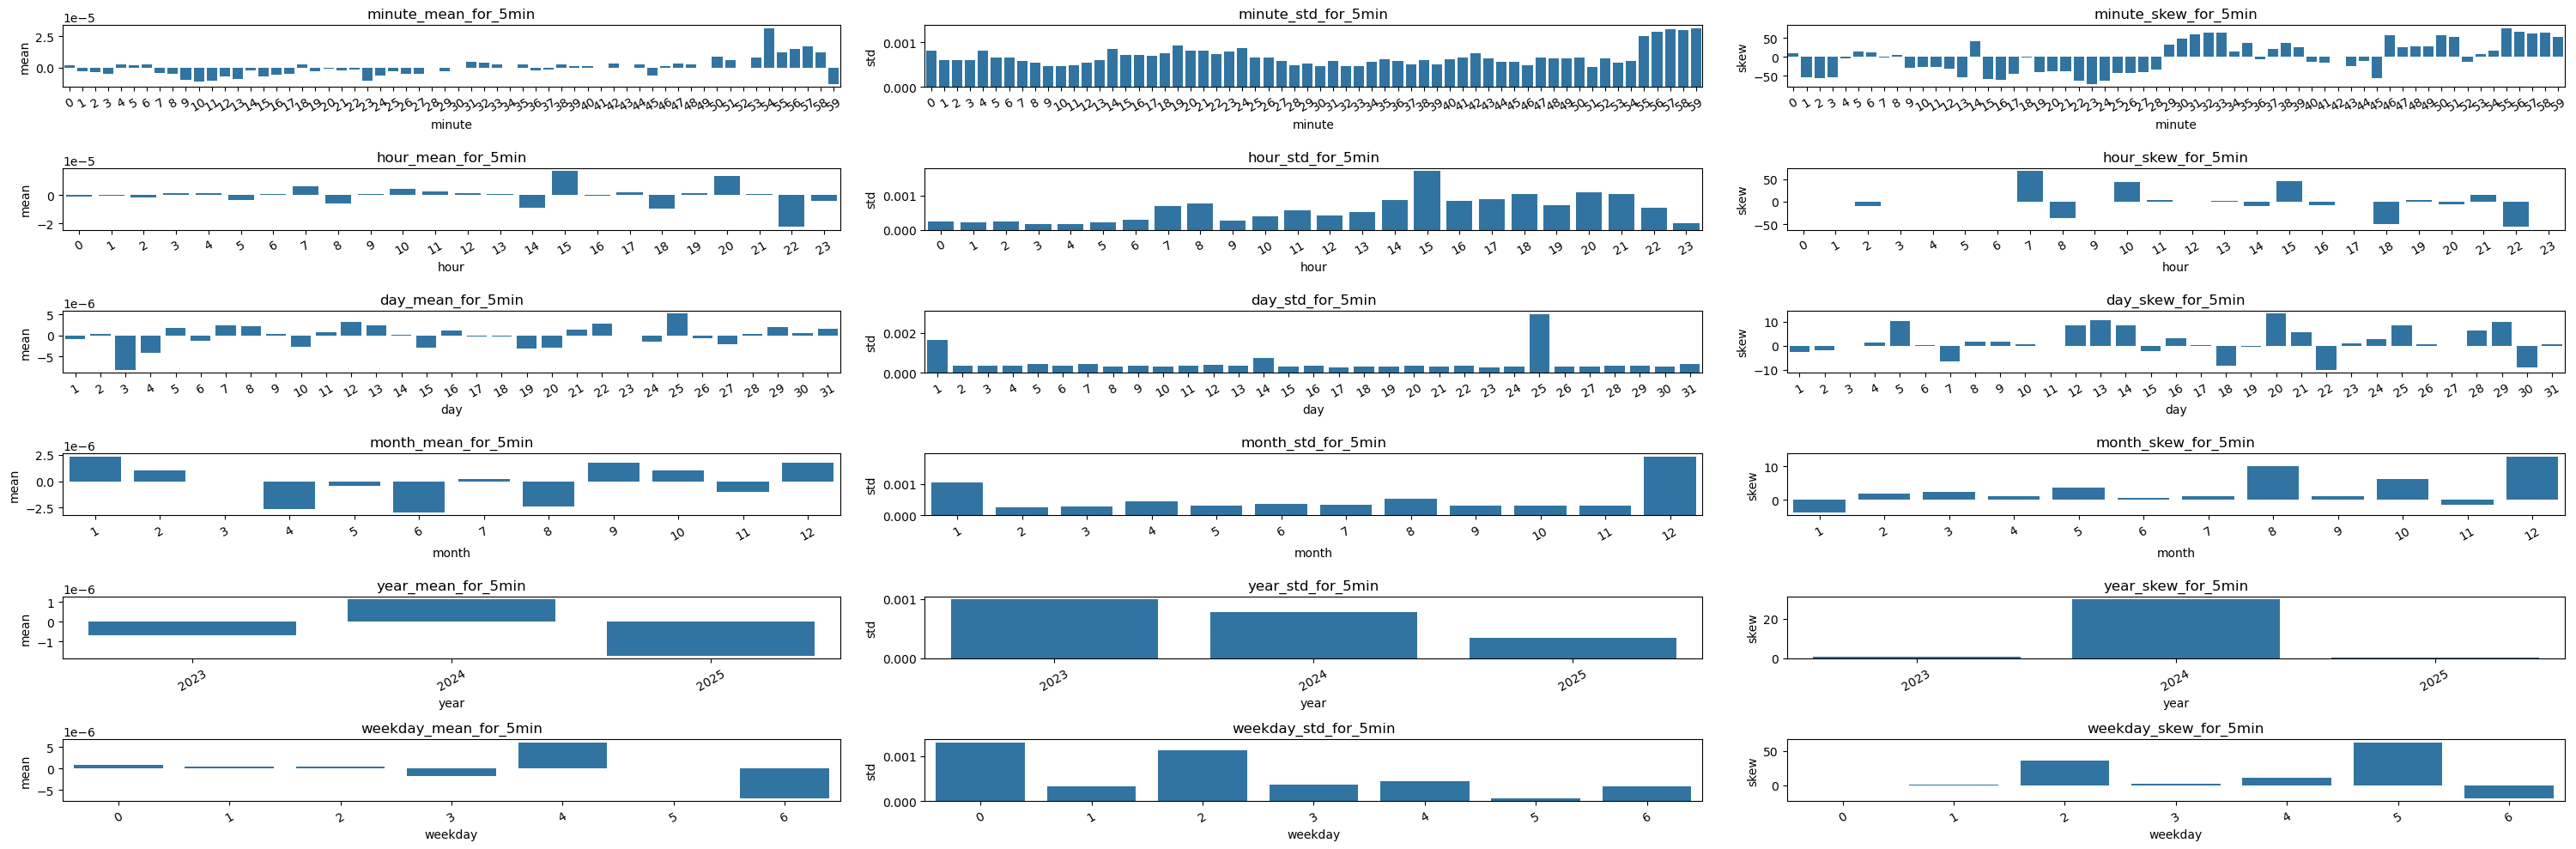

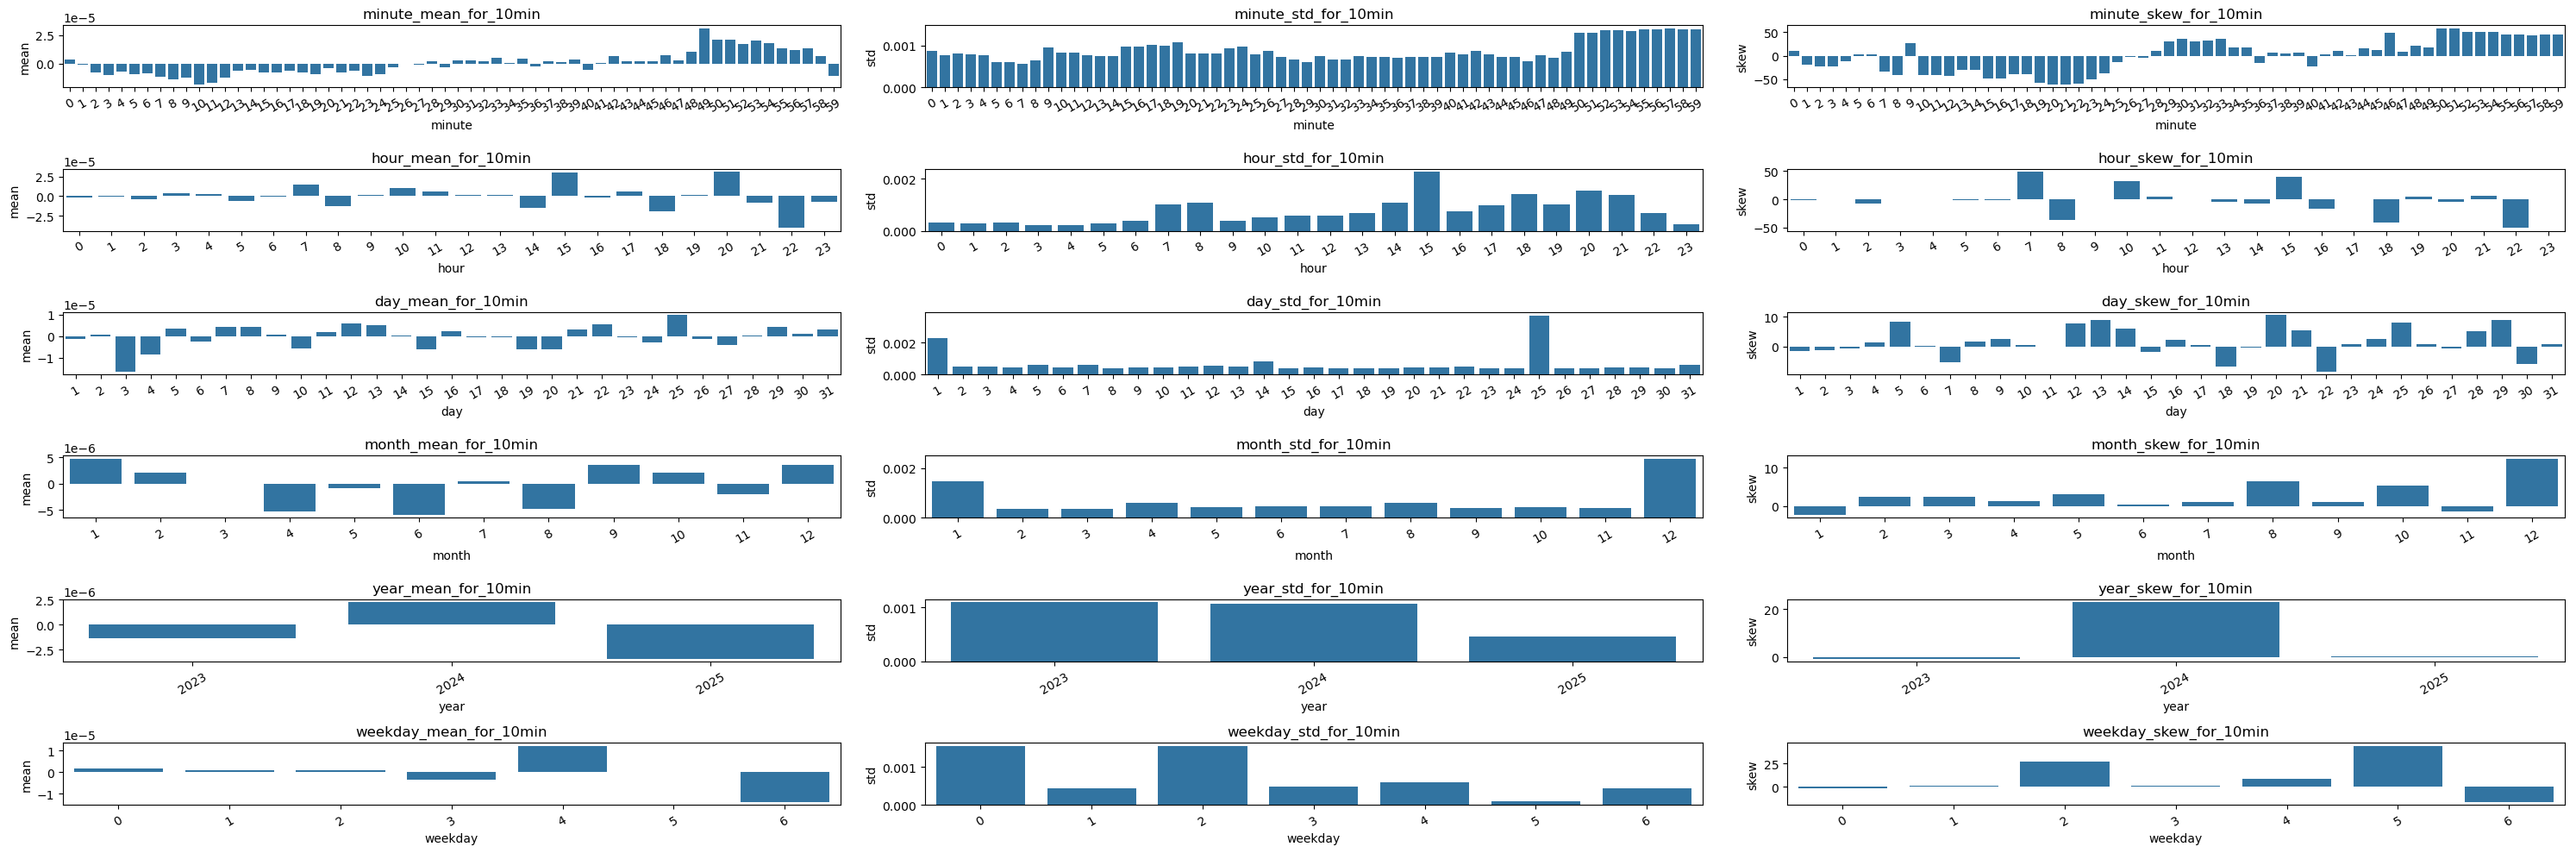

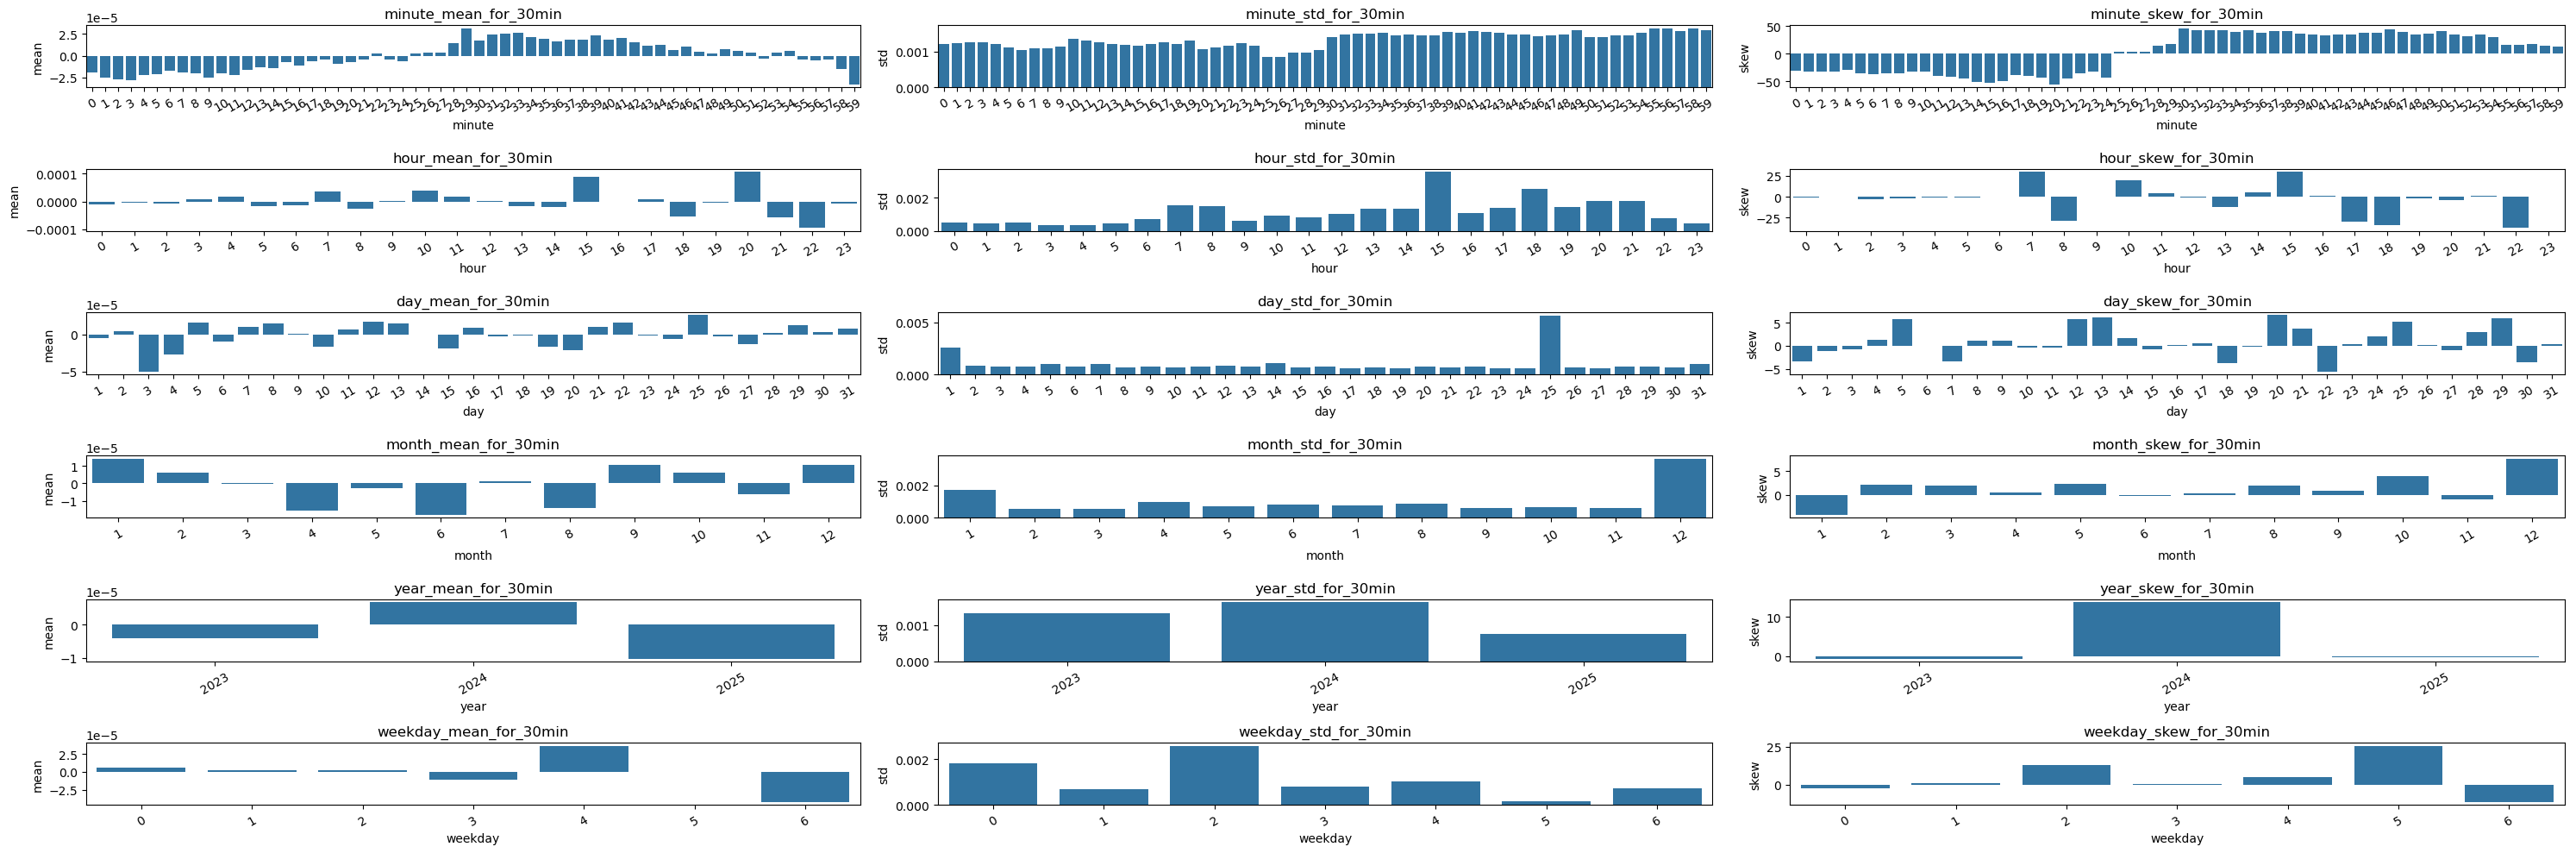

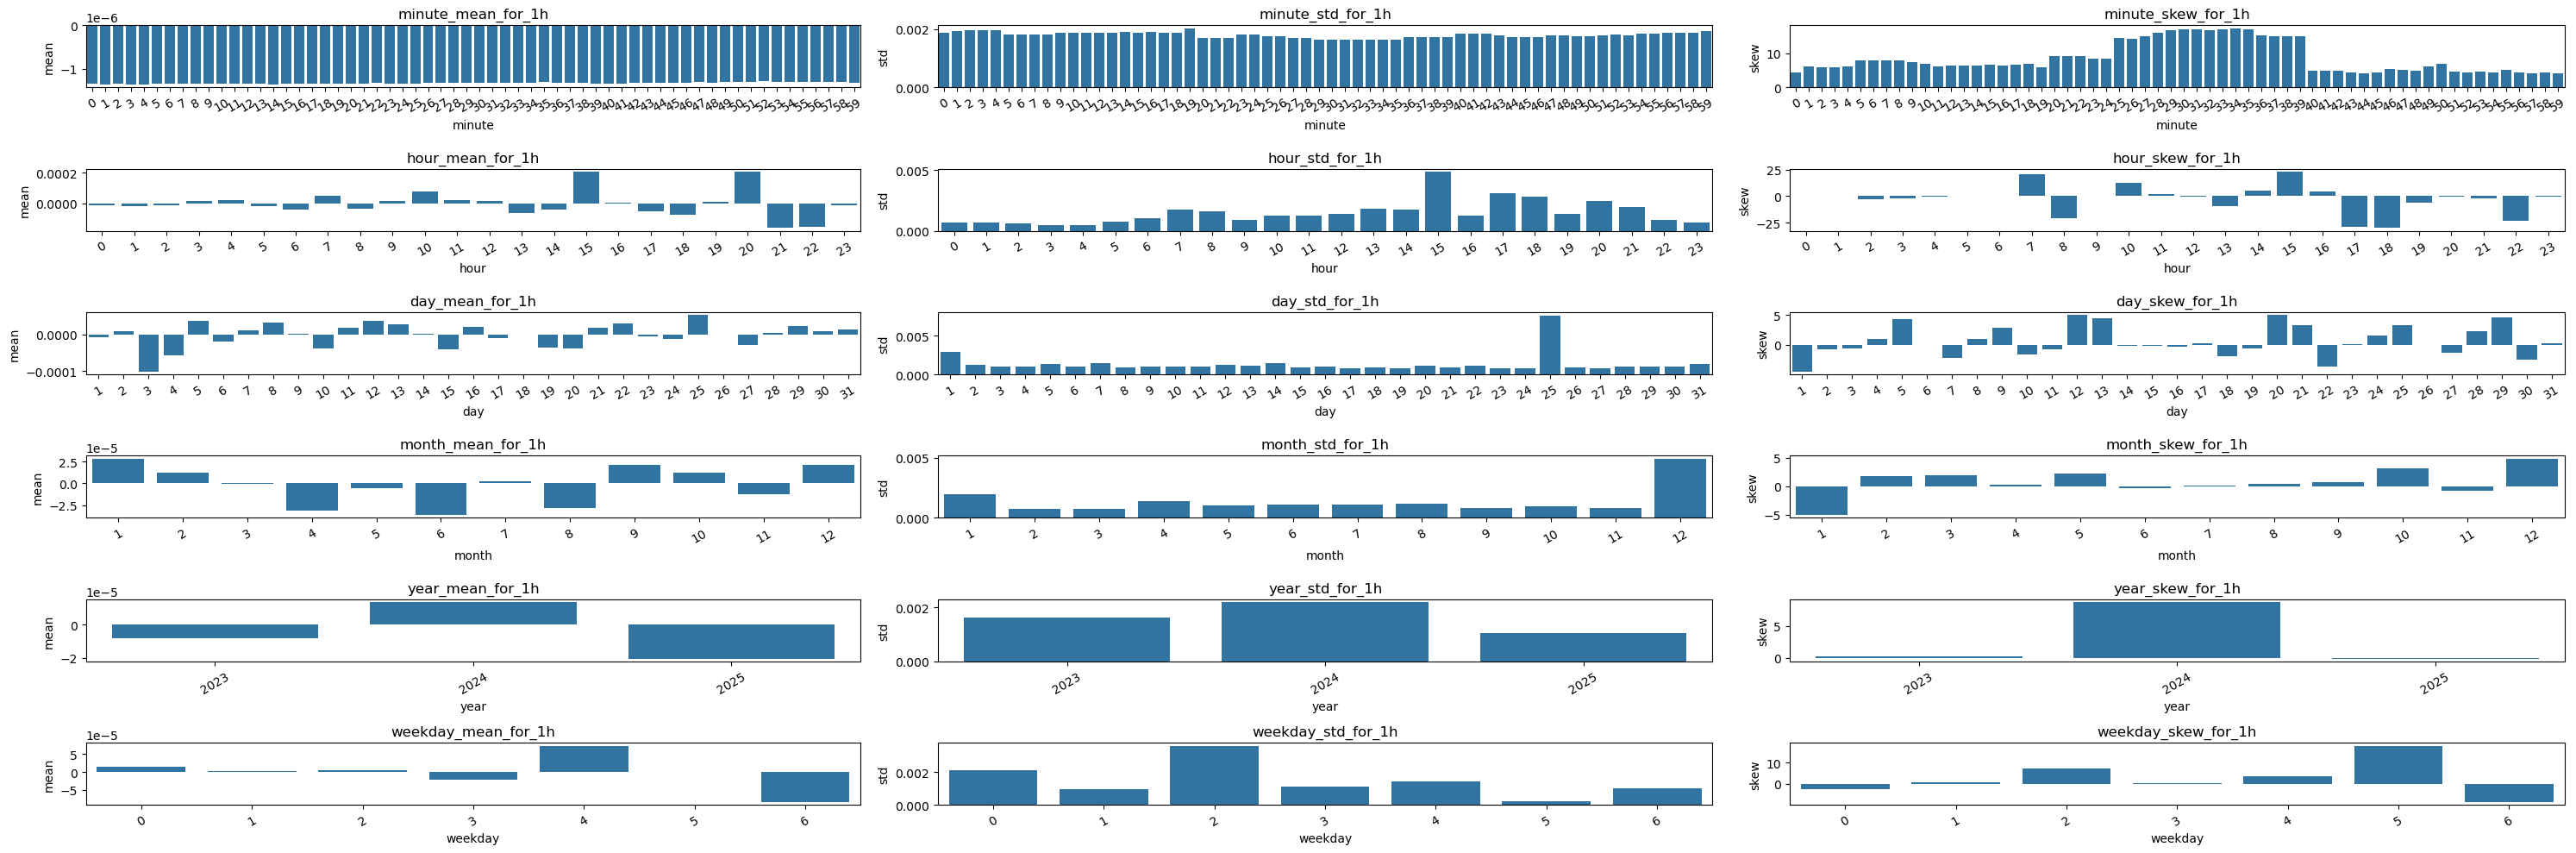

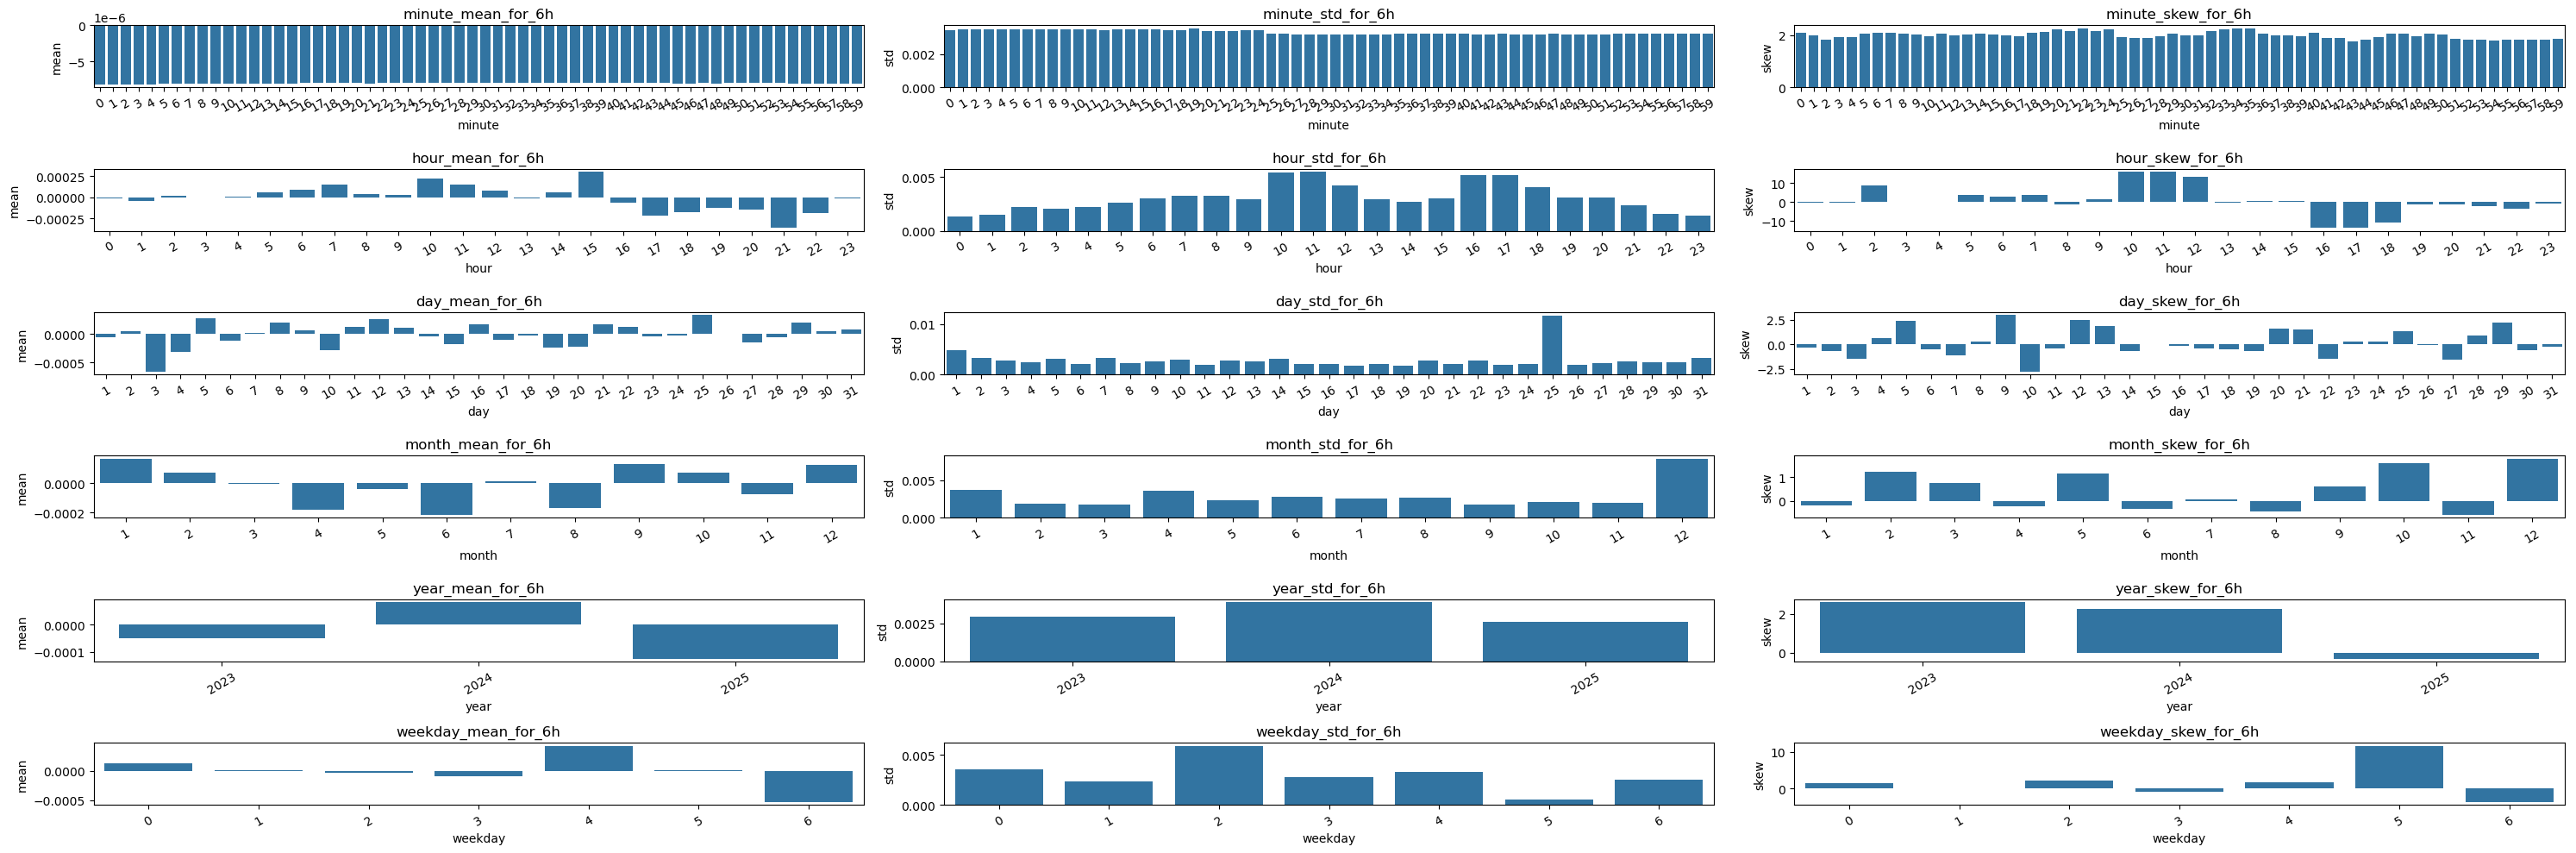

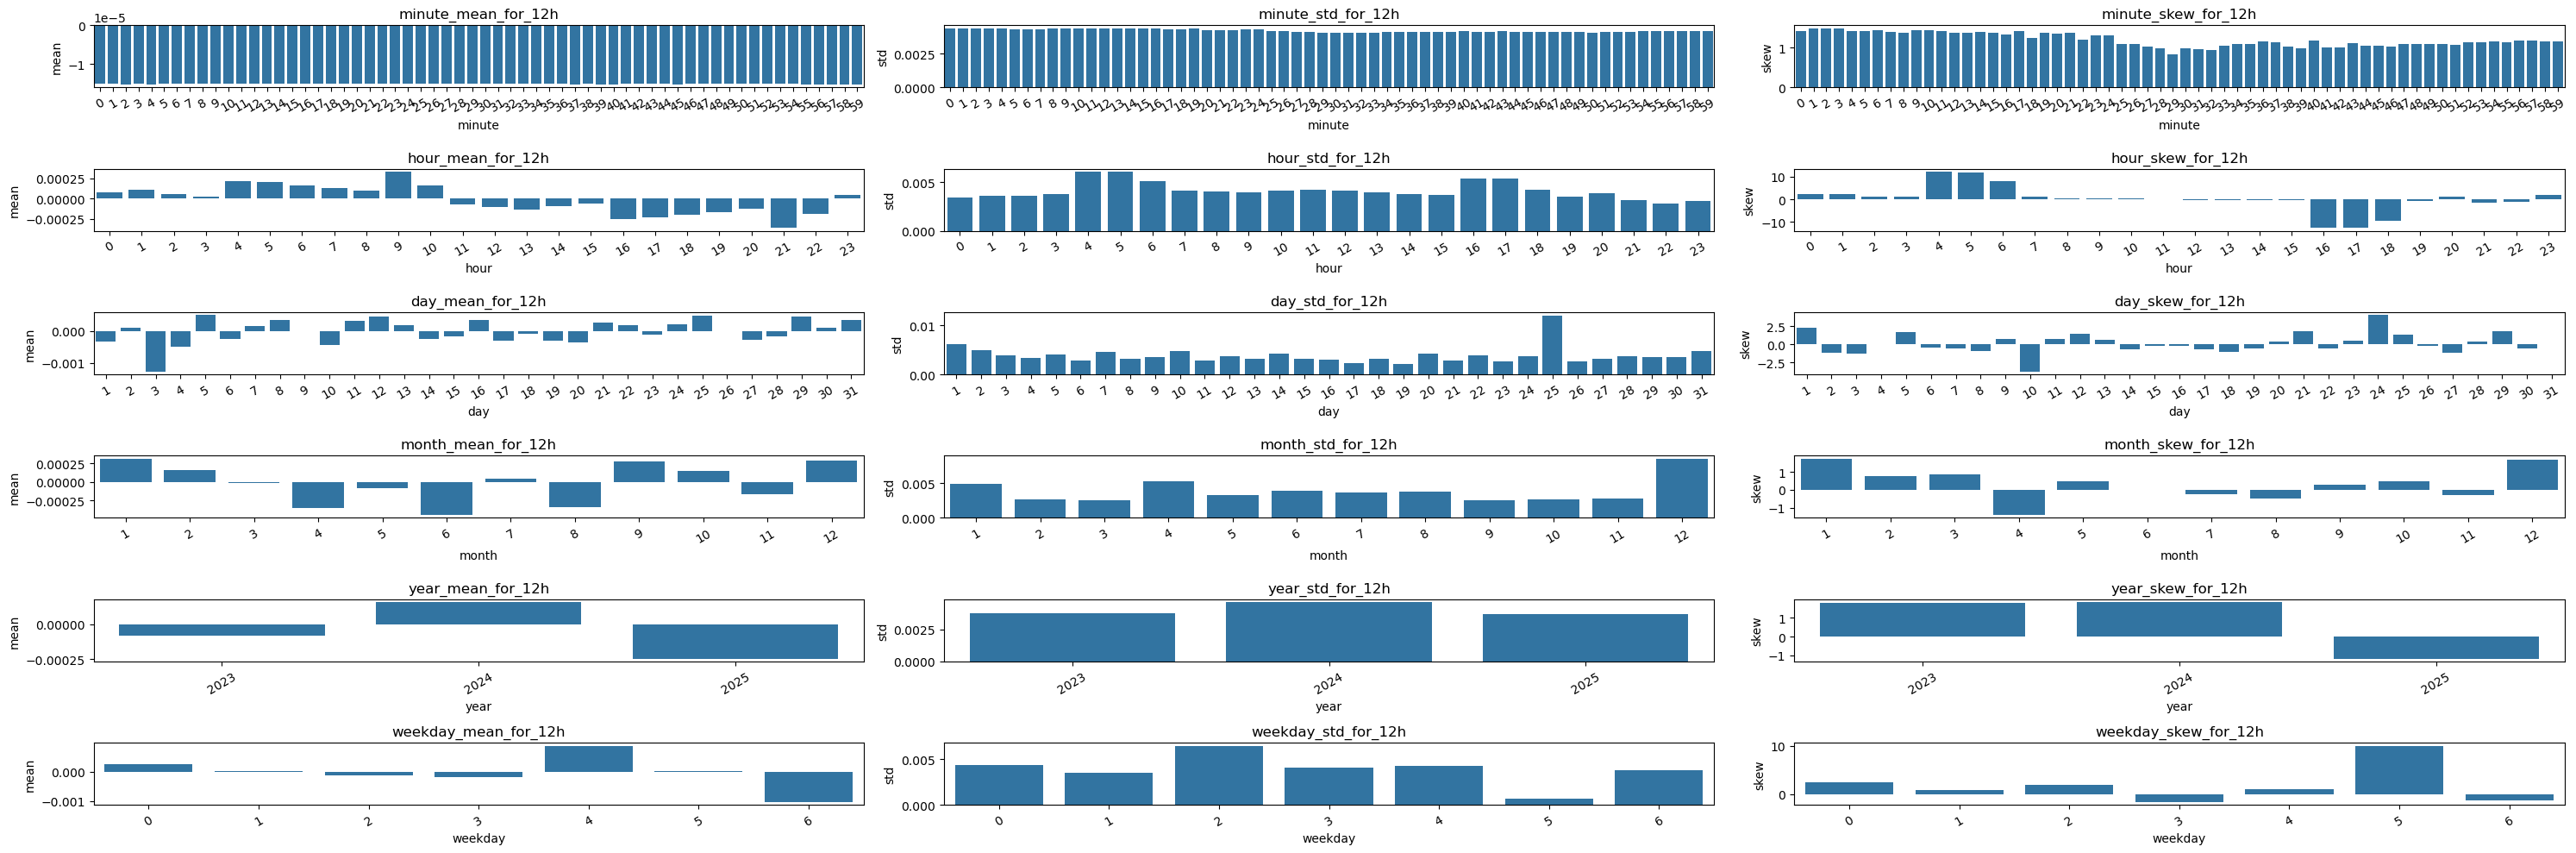

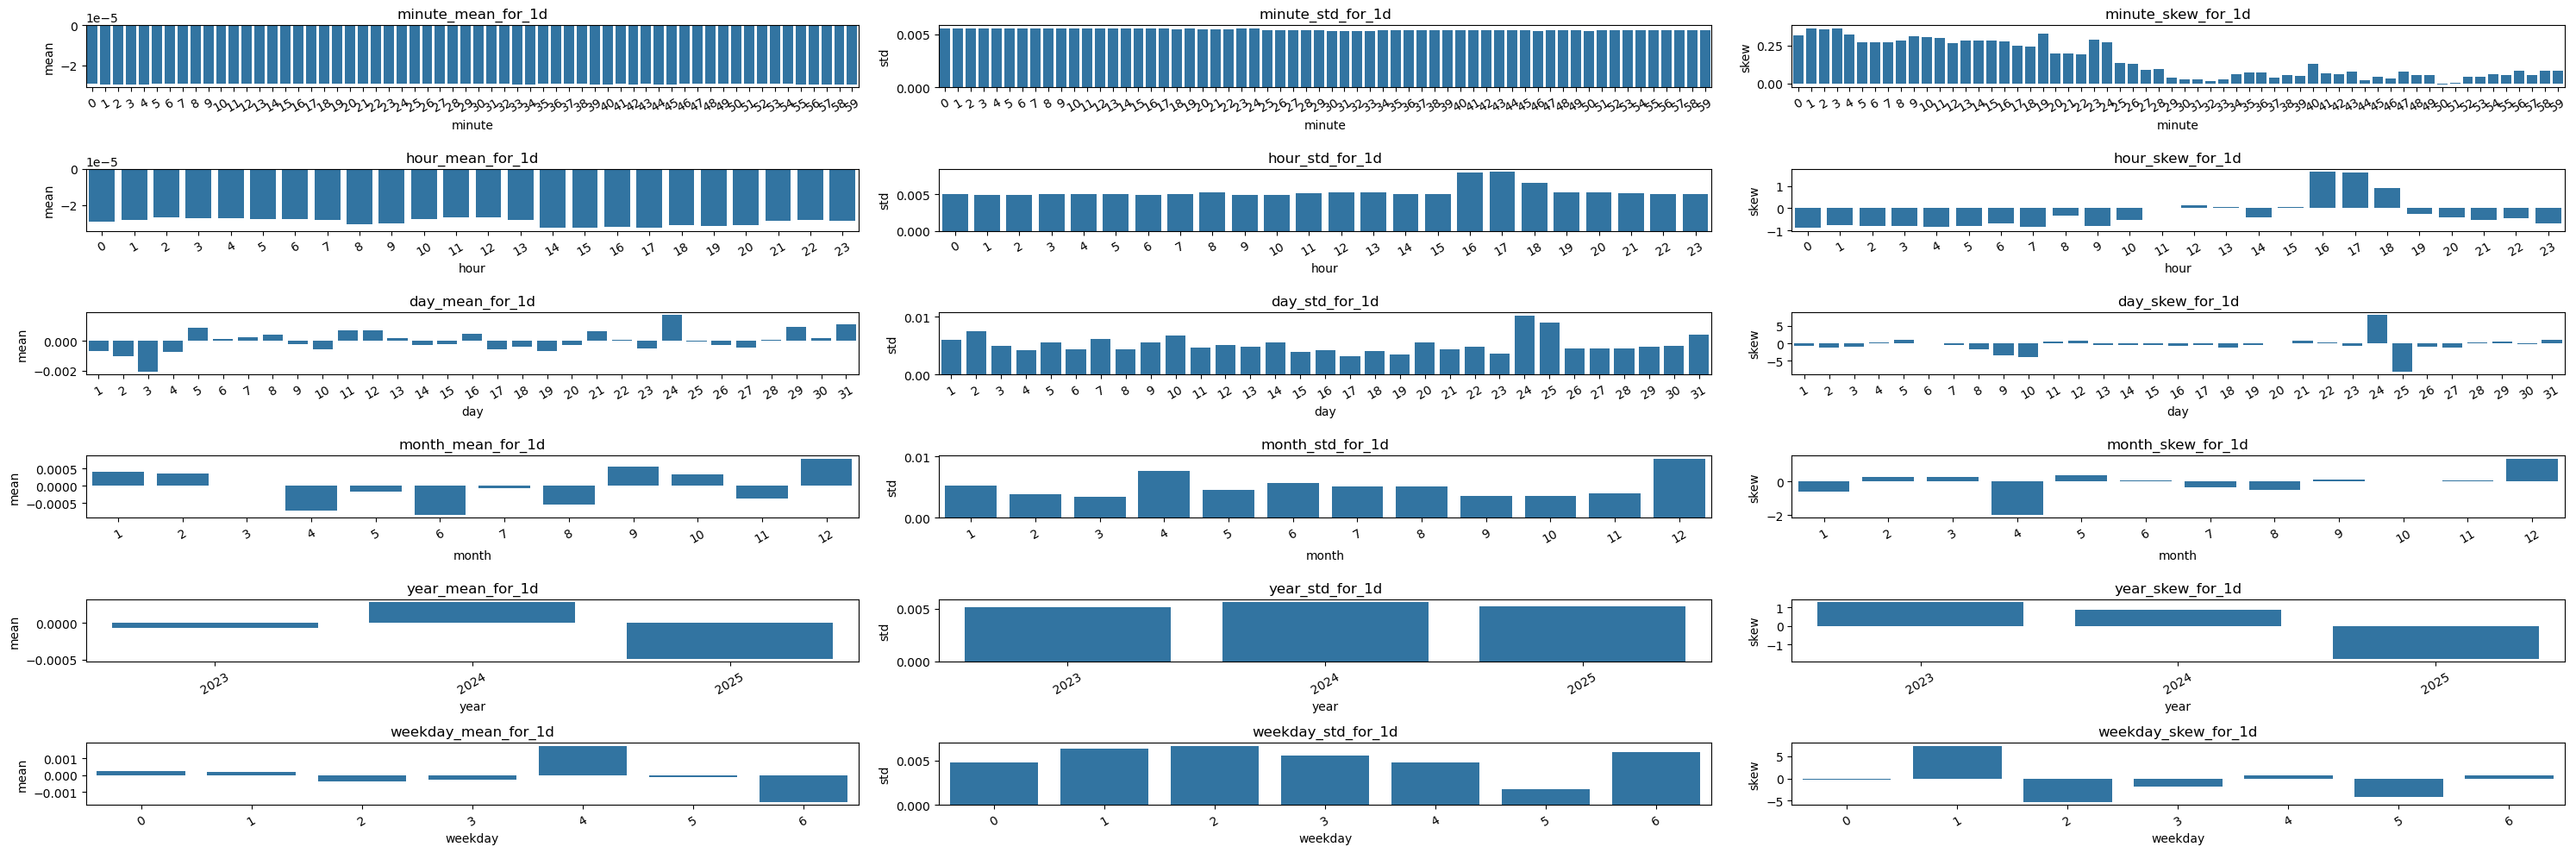

In [121]:
date_types = ['minute', 'hour', 'day', 'month', 'year', 'weekday']
stats_types = ['mean', 'std', 'skew']
for return_type in return_types:
    fig, axes = plt.subplots(len(date_types), len(stats_types), figsize=(30, 10))
    for date_type_i, date_type in enumerate(date_types):
        stats = data.groupby(date_type)[return_type].agg(stats_types)
        for stats_type_i, stats_type in enumerate(stats_types):
            sns.barplot(data=stats, x=stats.index, y=stats_type, ax=axes[date_type_i, stats_type_i])
            axes[date_type_i, stats_type_i].set_title(f'{date_type}_{stats_type}_for_{return_type}')
            axes[date_type_i, stats_type_i].tick_params(axis='x', rotation=30)

    plt.tight_layout()
    plt.show()
        

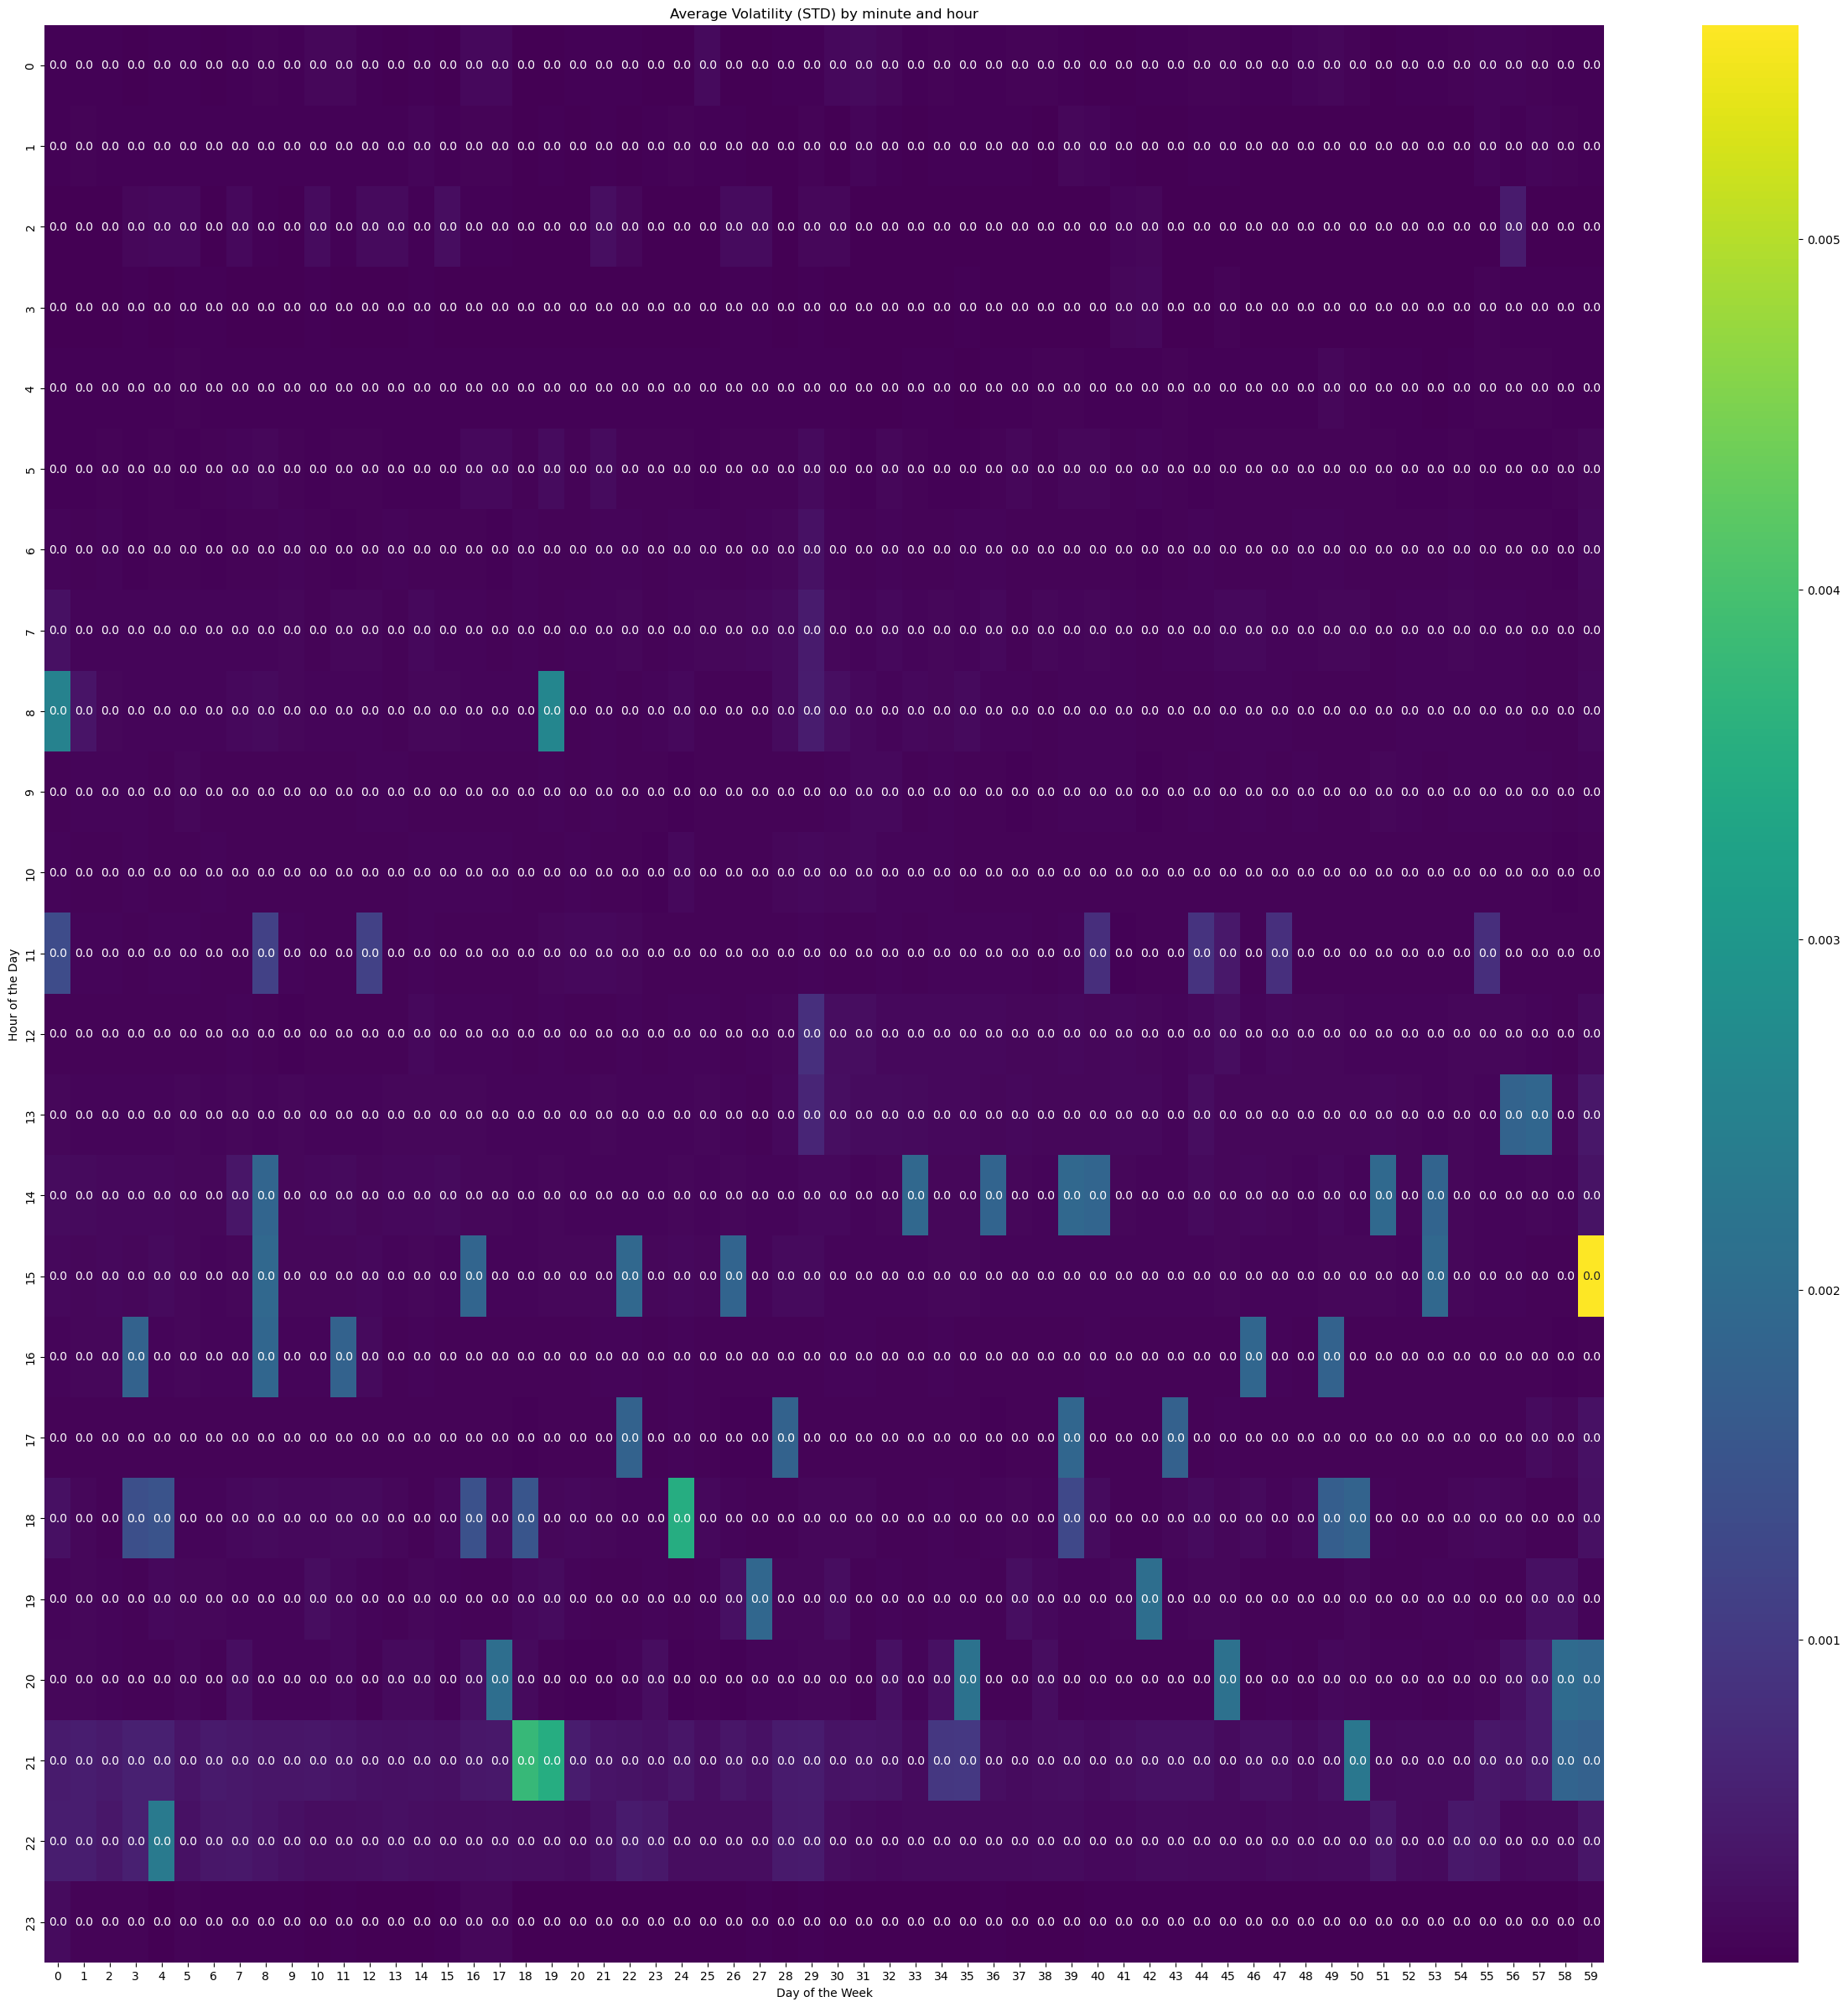

In [123]:
train_data = data[:int(len(data) * 0.7)]
heatmap_data = train_data.groupby(['hour', 'minute']).std().reset_index()
heatmap_pivot = heatmap_data.pivot(index='hour', columns='minute', values='1')
plt.figure(figsize=(30,30))
sns.heatmap(heatmap_pivot, cmap='viridis', annot=True, fmt='.1f')
plt.title('Average Volatility (STD) by minute and hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

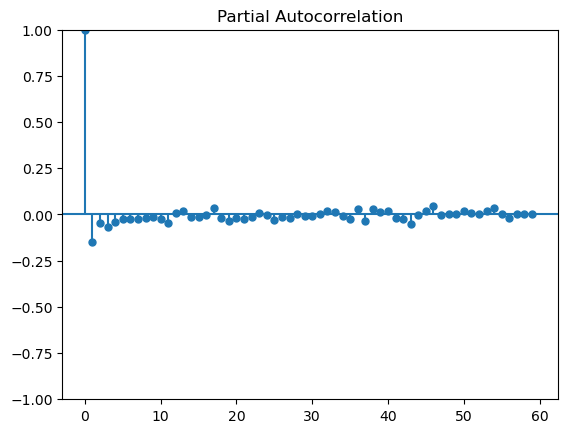

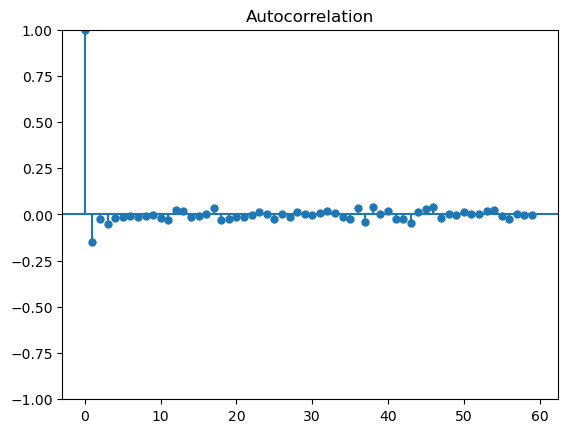

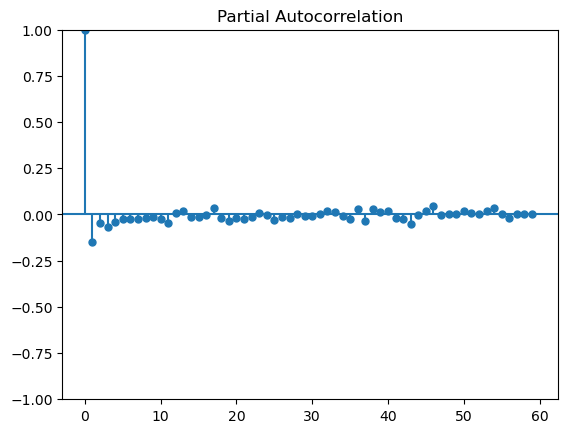

In [128]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train_data['1min'])
plot_pacf(train_data['1min'])